In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

53.58023017257594 5.377626378694515
-5.123733876731748 -22.949605708548034
-67.75963428907498 139.69868072242224
53.49164358482477 -70.54803520854662
53.576717206189386 -19.650531396442375
11.23308120937375 -175.74026600148972
63.322841309296365 -114.83795970179132
8.72469409071013 165.89072484071107
6.285343045657129 122.41837230587828
-27.62341283642631 142.93432292439843
-50.17221536511601 -96.53124347107196
72.52482713288944 68.95390925770266
-50.51386835271897 -120.09188957428476
-74.02661160272655 -55.51725833890194
-75.66732144517542 -177.01454084856903
64.44854973996243 28.38315015828141
11.860812894618533 -146.7775747818072
72.28157416636648 -127.38915930088518
73.31586831842216 131.18173761153645
32.77479295049007 158.71362536513288
-28.11000731719873 88.50648315163676
-42.81184166295846 23.891588437831416
-61.7243708996094 33.45192272003041
-59.3768826186037 175.63626516798234
6.56834097406481 132.0002019323054
-10.19313685995023 12.503245048647841
13.023967569076703 31.1829

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25ecde87e3631e9c881b723607d9551c


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | harlingen
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | hauterive
Processing Record 5 of Set 1 | dingle
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | tuburan
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | yar-sale
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | kajaani
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | plettenberg bay
Processing Reco

City not found. Skipping...
Processing Record 36 of Set 4 | coquimbo
Processing Record 37 of Set 4 | amderma
City not found. Skipping...
Processing Record 38 of Set 4 | taoudenni
Processing Record 39 of Set 4 | mahebourg
Processing Record 40 of Set 4 | kargapolye
City not found. Skipping...
Processing Record 41 of Set 4 | ahipara
Processing Record 42 of Set 4 | kansanshi
Processing Record 43 of Set 4 | lagoa
Processing Record 44 of Set 4 | xichang
Processing Record 45 of Set 4 | tessalit
Processing Record 46 of Set 4 | trelew
Processing Record 47 of Set 4 | ourossogui
Processing Record 48 of Set 4 | prince rupert
Processing Record 49 of Set 4 | klerksdorp
Processing Record 50 of Set 4 | atuona
Processing Record 1 of Set 5 | brae
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | hokitika
Processing Record 5 of Set 5 | szigetvar
Processing Record 6 of Set 5 | dubrovka
Processing Record

Processing Record 26 of Set 8 | sungaipenuh
Processing Record 27 of Set 8 | farah
Processing Record 28 of Set 8 | predivinsk
Processing Record 29 of Set 8 | loralai
Processing Record 30 of Set 8 | otradnoye
Processing Record 31 of Set 8 | livingstonia
Processing Record 32 of Set 8 | whitianga
Processing Record 33 of Set 8 | jiexiu
Processing Record 34 of Set 8 | mandal
Processing Record 35 of Set 8 | christchurch
Processing Record 36 of Set 8 | nalut
Processing Record 37 of Set 8 | oktyabrskoye
Processing Record 38 of Set 8 | merauke
Processing Record 39 of Set 8 | karratha
Processing Record 40 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 41 of Set 8 | tautira
Processing Record 42 of Set 8 | biratnagar
Processing Record 43 of Set 8 | faanui
Processing Record 44 of Set 8 | mbarara
Processing Record 45 of Set 8 | moerai
Processing Record 46 of Set 8 | dudinka
Processing Record 47 of Set 8 | portland
Processing Record 48 of Set 8 | goulburn
Processing Record 49 of Set

Processing Record 14 of Set 12 | taltal
Processing Record 15 of Set 12 | ocozocoautla
City not found. Skipping...
Processing Record 16 of Set 12 | capannori
Processing Record 17 of Set 12 | olga
Processing Record 18 of Set 12 | caravelas
Processing Record 19 of Set 12 | byron bay
Processing Record 20 of Set 12 | grande-synthe
Processing Record 21 of Set 12 | ulladulla
Processing Record 22 of Set 12 | hernani
Processing Record 23 of Set 12 | okhotsk
Processing Record 24 of Set 12 | sitka
Processing Record 25 of Set 12 | gorontalo
Processing Record 26 of Set 12 | komsomolskiy
Processing Record 27 of Set 12 | kegayli
City not found. Skipping...
Processing Record 28 of Set 12 | selma
Processing Record 29 of Set 12 | hartford
Processing Record 30 of Set 12 | bertoua
Processing Record 31 of Set 12 | gualaquiza
Processing Record 32 of Set 12 | krutikha
Processing Record 33 of Set 12 | golkoy
Processing Record 34 of Set 12 | nemuro
Processing Record 35 of Set 12 | valparaiso
Processing Record 

In [34]:
city_weather

{'coord': {'lon': 29.8514, 'lat': 47.0794},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 32.63,
  'feels_like': 25,
  'temp_min': 32.63,
  'temp_max': 32.63,
  'pressure': 998,
  'humidity': 96,
  'sea_level': 998,
  'grnd_level': 993},
 'visibility': 2858,
 'wind': {'speed': 7.09, 'deg': 221},
 'clouds': {'all': 95},
 'dt': 1612040905,
 'sys': {'country': 'UA', 'sunrise': 1611984497, 'sunset': 1612018760},
 'timezone': 7200,
 'id': 690038,
 'name': 'Velyka Mykhaylivka',
 'cod': 200}

In [36]:
weather_description = city_weather["weather"][0]["description"]
weather_description

'overcast clouds'

In [11]:
len(city_data)

564

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-01-30 21:06:55,77.4840,-69.3632,-4.49,73,100,1.50
1,Nouadhibou,MR,2021-01-30 21:06:56,20.9310,-17.0347,75.20,46,58,13.80
2,Portland,US,2021-01-30 21:06:15,45.5234,-122.6762,50.00,81,75,12.66
3,Viedma,AR,2021-01-30 21:06:56,-40.8135,-62.9967,72.00,40,57,16.33
4,Margate,GB,2021-01-30 21:06:56,51.3813,1.3862,39.99,80,99,8.01
5,Santa Helena De Goias,BR,2021-01-30 21:06:56,-17.8136,-50.5969,84.74,63,21,3.04
6,Hobart,AU,2021-01-30 21:06:20,-42.8794,147.3294,60.01,67,20,11.50
7,Aguimes,ES,2021-01-30 21:05:02,27.9054,-15.4461,64.40,72,20,19.57
8,Avarua,CK,2021-01-30 21:06:54,-21.2078,-159.7750,82.40,74,100,4.61
9,Lerwick,GB,2021-01-30 21:06:57,60.1545,-1.1494,37.40,75,75,12.66


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

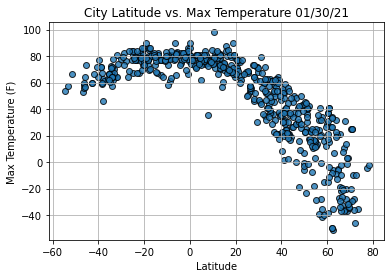

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

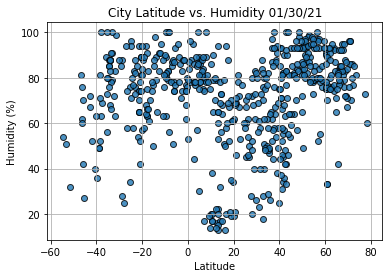

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

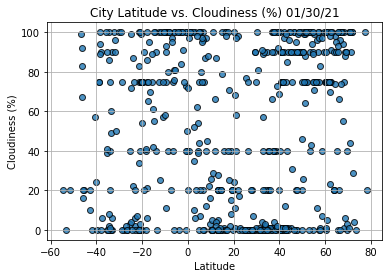

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

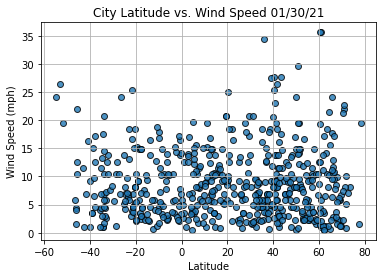

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]

In [21]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2021-01-30 21:05:15
Lat                       19.7297
Lng                       -155.09
Max Temp                     78.8
Humidity                       61
Cloudiness                     20
Wind Speed                   5.75
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
559    False
560     True
561    False
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-01-30 21:06:55,77.4840,-69.3632,-4.49,73,100,1.50
1,Nouadhibou,MR,2021-01-30 21:06:56,20.9310,-17.0347,75.20,46,58,13.80
2,Portland,US,2021-01-30 21:06:15,45.5234,-122.6762,50.00,81,75,12.66
4,Margate,GB,2021-01-30 21:06:56,51.3813,1.3862,39.99,80,99,8.01
7,Aguimes,ES,2021-01-30 21:05:02,27.9054,-15.4461,64.40,72,20,19.57


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

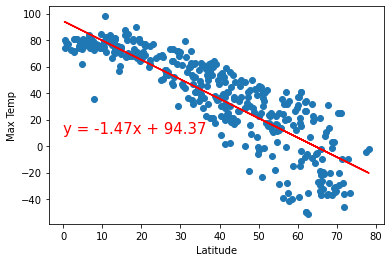

Text(0.5, 1.0, 'Linear Regression on the Northern Hemisphere for Maximum Temperature')

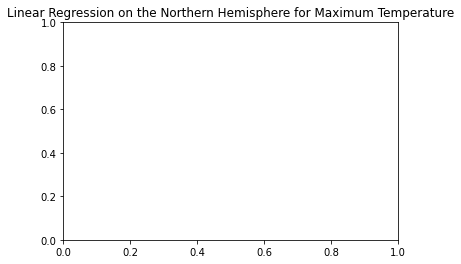

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,10))
plt.title("Linear Regression on the Northern Hemisphere for Maximum Temperature")

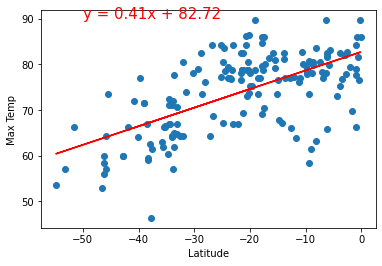

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature", 'Max Temp',(-50,90))

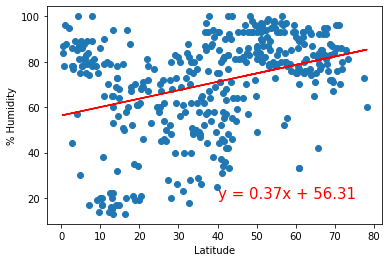

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

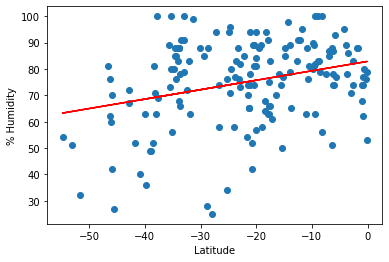

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,20))

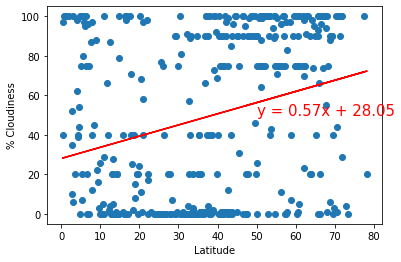

In [29]:
# Linear regression on the Northern Hemisphere Cloud
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,50))

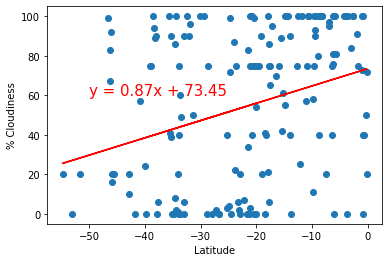

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

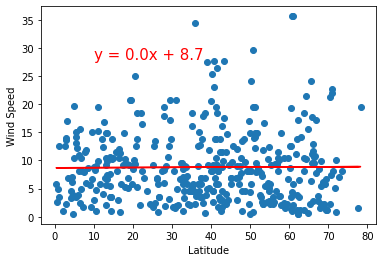

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,28))

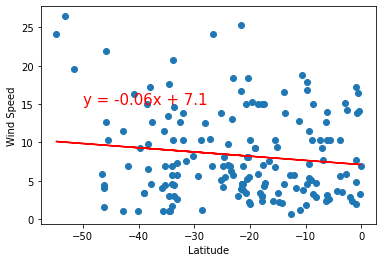

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))